In [1]:
#Analyze the prices of homes in London on a monthly basis
#Use machine learning to predict a trend in home prices in certain neighborhoods
#Start with two specific neighborhoods individually then to a general trend

import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime

In [2]:
london_housing = pd.read_csv("Datasets/housing_in_london_monthly_variables.csv")
london_housing["no_of_crimes"] = london_housing["no_of_crimes"].fillna(0)
london_housing['date'] = pd.to_datetime(london_housing.date)
london_housing = pd.DataFrame(london_housing)
london_housing.fillna(0)

london_housing.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,0.0,1
1,1995-02-01,city of london,82203,E09000001,7.0,0.0,1
2,1995-03-01,city of london,79121,E09000001,14.0,0.0,1
3,1995-04-01,city of london,77101,E09000001,7.0,0.0,1
4,1995-05-01,city of london,84409,E09000001,10.0,0.0,1


In [3]:
london_housing.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [4]:
london_housing.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [5]:
london_housing.date.unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [6]:
london_housing.nunique()

date               301
area                45
average_price    13343
code                45
houses_sold       3946
no_of_crimes      2669
borough_flag         2
dtype: int64

In [7]:
#Make a line graph comparing the areas and their prices over the years

group_areas = pd.DataFrame(london_housing, columns = ['date','area','average_price'])
# group_areas = group_areas[group_areas['area'] == 'city of london']
group_areas = pd.DataFrame(group_areas.groupby(['area','date'], as_index=False).sum())
group_areas = group_areas.pivot(index = "area", columns="date", values = "average_price")
group_areas 

date,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,...,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00
area,,,,,,,,,,,,,,,,,,,,,
barking and dagenham,50460,51086,51269,53134,53042,53700,52113,52232,51472,51514,...,296360,296555,295600,299538,300702,305277,304153,305882,301816,301057
barnet,93285,93190,92248,90763,90258,90107,91441,92361,93273,92567,...,512588,503721,511926,514134,527996,527115,525739,523582,517986,520682
bexley,64958,64788,64367,64278,63997,64252,63723,64433,64510,64530,...,339948,337445,339964,338721,338702,334826,334510,334711,336972,331683
brent,71307,72022,72016,72966,73704,74310,74127,73547,73790,73264,...,487049,482244,472702,470872,486068,500246,494527,431249,431245,408523
bromley,81671,81658,81449,81124,81543,82383,82899,82054,81440,81862,...,432875,430231,432035,435329,442452,440620,439782,438792,443391,436757
camden,120933,119509,120282,120098,119929,121887,124028,125530,120597,117458,...,822533,836880,871354,881212,855721,828560,799950,818880,807466,810298
city of london,91449,82203,79121,77101,84409,94901,110128,112329,104473,108038,...,738842,718773,743157,719871,777613,792034,827093,777610,734872,775309
croydon,69158,68951,68712,68610,68845,69053,69142,68993,69394,68935,...,364013,364371,363161,365262,363885,364997,364424,367458,369301,368662
ealing,79886,80897,81380,82189,82077,81631,82352,82707,82011,80523,...,461320,465025,472063,473089,473808,475064,478329,475304,470862,473268


In [8]:
dt = london_housing['date'].values
dt = dt.astype('datetime64[D]').astype(int)
dt


array([ 9131,  9162,  9190, ..., 18201, 18231, 18262])

In [9]:
london_housing['date'] = dt

In [10]:
hs = london_housing['houses_sold'].values
hs = hs.astype('float64').astype(int)
london_housing['houses_sold'] = hs

In [11]:
london_housing.dtypes

date               int32
area              object
average_price      int64
code              object
houses_sold        int32
no_of_crimes     float64
borough_flag       int64
dtype: object

In [12]:
#do a linear regression line start with a line plot of two different neighborhoods and add a regression line
#compare prices to date for the city of london
city_of_london = london_housing[london_housing['area'] == 'city of london']
city_of_london = city_of_london.replace(-2147483648, 0)

X = city_of_london.iloc[:,0].values.reshape(-1,1)
Y = city_of_london.iloc[:,2].values.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column

Y_2 = city_of_london.iloc[:,4].values.reshape(-1,1) 

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#linear regression for the homes sold
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X, Y_2)
Y_pred_2 = linear_regressor_2.predict(Y_2)

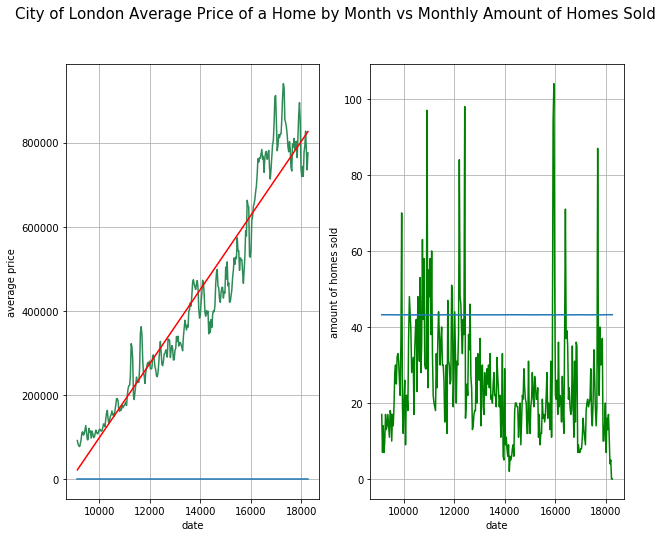

In [39]:
#Linear Regression for the city of London

#compare to houses sold in the city of London
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle("City of London Average Price of a Home by Month vs Monthly Amount of Homes Sold", fontsize = 15)

ax1.plot(X, Y, color = 'seagreen')
ax1.plot(X, Y_pred, color='red')
ax1.plot(X, Y_pred_2)
ax1.set(xlabel = 'date', ylabel='average price')
ax1.grid()

ax2.plot(X, Y_2, color = "green")
ax2.plot(X, Y_pred_2)
ax2.set(xlabel = 'date', ylabel='amount of homes sold')
ax2.grid()

plt.savefig("Visualizations/London_Home_Prices_vs_Homes_Sold")
plt.show()

In [15]:
#k nearest numbers to predict the prices by the neighborhood or houses sold